<a href="https://colab.research.google.com/github/rjn991/leafTech/blob/main/LeafTech0_0_4_Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! mv kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download -d aryashah2k/indian-medicinal-leaves-dataset
! unzip /content/indian-medicinal-leaves-dataset.zip

In [ ]:
!pip install np_utils

In [ ]:
import keras,os
import numpy as np
import tensorflow as tf
import cv2
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential , load_model , Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
import np_utils
from tensorflow.keras import applications
from tensorflow.keras import optimizers


In [ ]:
data_dir = r'/content/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset'

image_generator = ImageDataGenerator(validation_split=0.2)



train_data_dir = image_generator.flow_from_directory(batch_size=32,
                                                 directory=data_dir,
                                                 shuffle=True,
                                                 target_size=(299, 299),
                                                 subset="training",
                                                 class_mode='categorical')

validation_dir = image_generator.flow_from_directory(batch_size=32,
                                                 directory=data_dir,
                                                 shuffle=True,
                                                 target_size=(299, 299),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 5556 images belonging to 80 classes.
Found 1344 images belonging to 80 classes.


In [ ]:
base_model = applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(80, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalizati

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0][0

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('Inception_v3_leafs_checkpoints.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=False,
                             period=1,
                             verbose=1)


In [ ]:
callbacks = [checkpoint]
epochs = 10
batch_size = 32

In [ ]:
history = model.fit(
    train_data_dir,
    steps_per_epoch = train_data_dir.samples // batch_size,
    validation_data = validation_dir,
    validation_steps = validation_dir.samples // batch_size,
    epochs = epochs,
    callbacks=callbacks
    )
model.save('Inception_v3_leafs_final.h5')

Epoch 1/10
173/173 [==============================] - ETA: 0s - loss: 3.4918 - accuracy: 0.2381
Epoch 1: saving model to Inception_v3_leafs_checkpoints.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


173/173 [==============================] - 348s 2s/step - loss: 3.4918 - accuracy: 0.2381 - val_loss: 2.5314 - val_accuracy: 0.4062
Epoch 2/10
173/173 [==============================] - ETA: 0s - loss: 1.5033 - accuracy: 0.7145
Epoch 2: saving model to Inception_v3_leafs_checkpoints.h5
173/173 [==============================] - 304s 2s/step - loss: 1.5033 - accuracy: 0.7145 - val_loss: 1.5445 - val_accuracy: 0.6540
Epoch 3/10
173/173 [==============================] - ETA: 0s - loss: 0.6356 - accuracy: 0.8977
Epoch 3: saving model to Inception_v3_leafs_checkpoints.h5
173/173 [==============================] - 306s 2s/step - loss: 0.6356 - accuracy: 0.8977 - val_loss: 1.2805 - val_accuracy: 0.7001
Epoch 4/10
173/173 [==============================] - ETA: 0s - loss: 0.3093 - accuracy: 0.9616
Epoch 4: saving model to Inception_v3_leafs_checkpoints.h5
173/173 [==============================] - 310s 2s/step - loss: 0.3093 - accuracy: 0.9616 - val_loss: 1.1217 - val_accuracy: 0.7314
Epoch 5

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


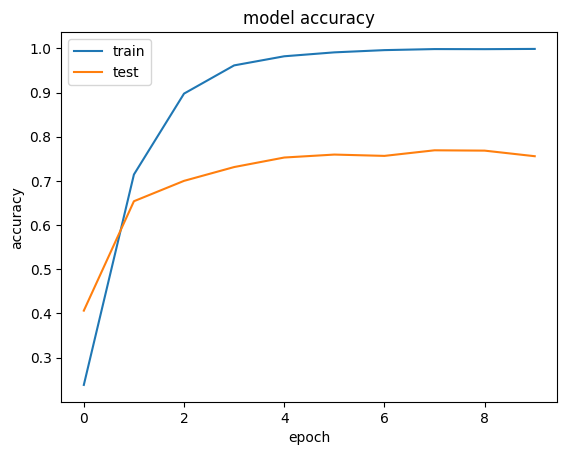

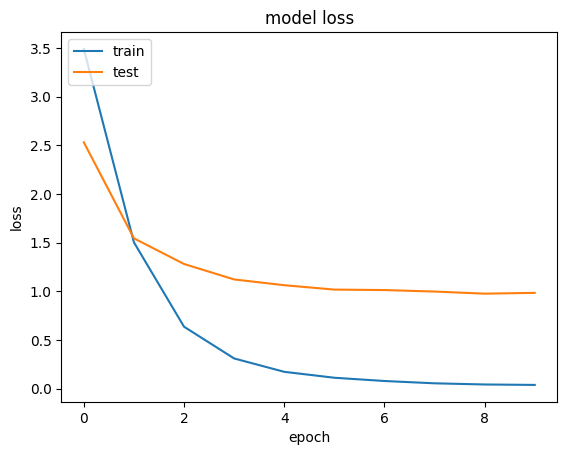

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()